<a href="https://colab.research.google.com/github/AdityaSharma2457/Data-Analysis-proejcts/blob/main/data_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AQI Dataset 📊 & Analysis Summary📈

This dataset is officially released by the Government of India, ensuring reliability and authenticity of the pollution data.

* 🌍 It contains air pollution measurements across multiple pollutant parameters for almost all major cities.

* 📊 Various analytical questions were explored using visualizations and graphs to simplify complex data patterns.

* 🔍 Graph-based analysis makes it easier to compare pollution levels across cities and parameters.

* 📈 Raw pollutant readings were transformed into clear, interpretable insights for better understanding.

* 🌱 The analysis supports data-driven awareness of air quality trends and environmental conditions.

* 🧠 This approach helps in identifying pollution hotspots and overall city-wise pollution patterns.

In [ ]:
import pandas as pd

df=pd.read_csv("AQI_DATASET.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3301 entries, 0 to 3300
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3301 non-null   object 
 1   state          3301 non-null   object 
 2   city           3301 non-null   object 
 3   station        3301 non-null   object 
 4   last_update    3301 non-null   object 
 5   latitude       3301 non-null   float64
 6   longitude      3301 non-null   float64
 7   pollutant_id   3301 non-null   object 
 8   pollutant_min  3157 non-null   float64
 9   pollutant_max  3157 non-null   float64
 10  pollutant_avg  3157 non-null   float64
dtypes: float64(5), object(6)
memory usage: 283.8+ KB


In [ ]:
df.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3301.000000,3301.000000,3157.000000,3157.000000,3157.000000
mean,22.931488,78.597034,36.132721,88.021223,57.404498
std,5.359100,4.812767,48.547689,96.801830,65.246944
min,8.514909,70.909168,1.000000,1.000000,1.000000
25%,19.110740,75.565602,6.000000,17.000000,12.000000
50%,23.549395,77.310100,17.000000,54.000000,32.000000
75%,27.237110,80.649110,48.000000,121.000000,82.000000
max,34.066206,94.636574,338.000000,500.000000,381.000000


**1. Build a suitable Graph showing real-time pollution status by city**

In [ ]:


df2=df.groupby("city")[["pollutant_avg"]].sum().reset_index().sort_values(by="pollutant_avg",ascending=False).reset_index(drop=True)


/tmp/ipython-input-2899115000.py:3: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df2["city"].tolist(),df2["pollutant_avg"].tolist(),label=["city","avg_pollution"])


Text(0, 0.5, 'average pollution')

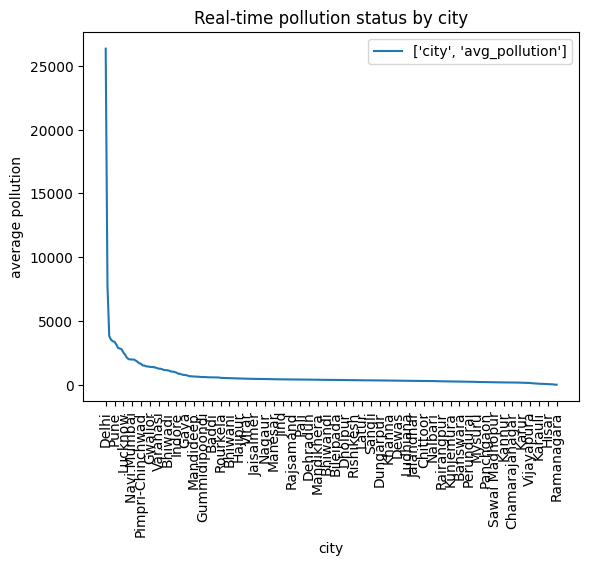

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df2["city"].tolist(),df2["pollutant_avg"].tolist(),label=["city","avg_pollution"])
plt.legend()
plt.title("Real-time pollution status by city")
plt.xlabel("city")
plt.xticks(
    ticks=range(0, len(city), 5),
    labels=city[::5],
    rotation=90
)
plt.ylabel("average pollution")

# 2. Identify top 10 most polluted stations.


In [ ]:

df3=df.groupby("station")[["pollutant_avg"]].sum().head(10).reset_index().sort_values("pollutant_avg",ascending=False).reset_index(drop=True)

Text(0, 0.5, 'average pollution')

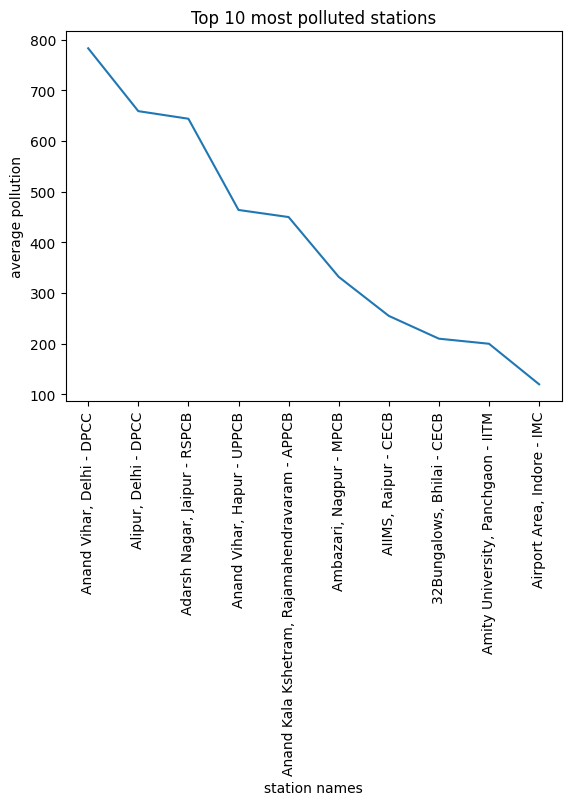

In [ ]:
plt.plot(df3['station'],df3['pollutant_avg'])
plt.xlabel("station names")
plt.title("Top 10 most polluted stations")
plt.xticks(rotation=90)
plt.ylabel("average pollution")

# 3. Compare pollution patterns across pollutants.

In [ ]:

df4=df.groupby("pollutant_id")[["pollutant_avg"]].sum().reset_index()
df4

,pollutant_id,pollutant_avg
0,CO,18625.0
1,NH3,2683.0
2,NO2,14520.0
3,OZONE,16182.0
4,PM10,56282.0
5,PM2.5,66400.0
6,SO2,6534.0


/tmp/ipython-input-2216561027.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'CO'),
  Text(1, 0, 'NH3'),
  Text(2, 0, 'NO2'),
  Text(3, 0, 'OZONE'),
  Text(4, 0, 'PM10'),
  Text(5, 0, 'PM2.5'),
  Text(6, 0, 'SO2')])

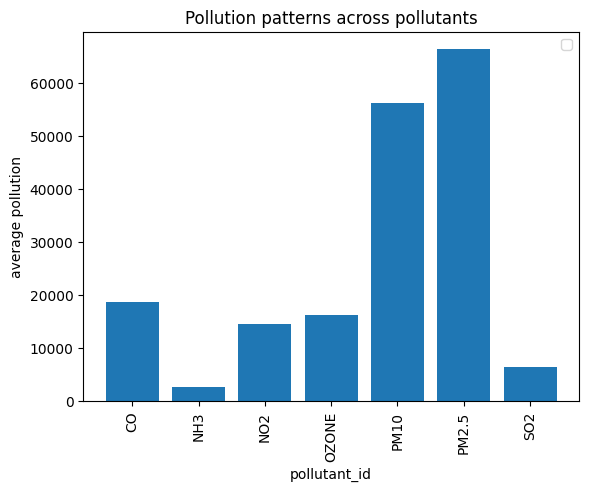

In [ ]:
import matplotlib.pyplot as plt

plt.bar(df4["pollutant_id"].tolist(),df4['pollutant_avg'].tolist())
plt.title("Pollution patterns across pollutants")
plt.xlabel("pollutant_id")
plt.ylabel("average pollution")
plt.legend()
plt.xticks(rotation=90)

# Q4. Create a pollution risk index per city.

In [ ]:
# 4. Create a pollution risk index per city.
df['percentage']=df[df["pollutant_id"]=="CO"]['pollutant_avg'].apply(lambda x : (x/1000)*100)
df['percentage1']=df[df["pollutant_id"]=="SO2"]['pollutant_avg'].apply(lambda x : (x/40)*100)
df['percentage2']=df[df["pollutant_id"]=="OZONE"]['pollutant_avg'].apply(lambda x : (x/50)*100)
df['percentage3']=df[df["pollutant_id"]=="PM2.5"]['pollutant_avg'].apply(lambda x : (x/30)*100)
df['percentage4']=df[df["pollutant_id"]=="PM10"]['pollutant_avg'].apply(lambda x : (x/50)*100)
df['percentage5']=df[df["pollutant_id"]=="NO2"]['pollutant_avg'].apply(lambda x : (x/40)*100)
df['percentage6']=df[df["pollutant_id"]=="NH3"]['pollutant_avg'].apply(lambda x : (x/200)*100)
df=df.fillna(0)
df["final_percentage"]=df["percentage"]+df["percentage1"]+df["percentage2"]+df["percentage3"]+df["percentage4"]+df["percentage5"]+df["percentage6"]


In [ ]:
df.drop("percentage",axis=1,inplace=True)
df.drop("percentage1",axis=1,inplace=True)
df.drop("percentage2",axis=1,inplace=True)
df.drop("percentage3",axis=1,inplace=True)
df.drop("percentage4",axis=1,inplace=True)
df.drop("percentage5",axis=1,inplace=True)
df.drop("percentage6",axis=1,inplace=True)

# now all parameters are in percentage form and now we can proceed further to compare them by plotting


In [ ]:
# now all parameters are in percentage form and now we can proceed further to compare them by plotting
df5=df.groupby("city")["final_percentage"].mean().reset_index().sort_values("final_percentage",ascending=False).reset_index(drop=True)

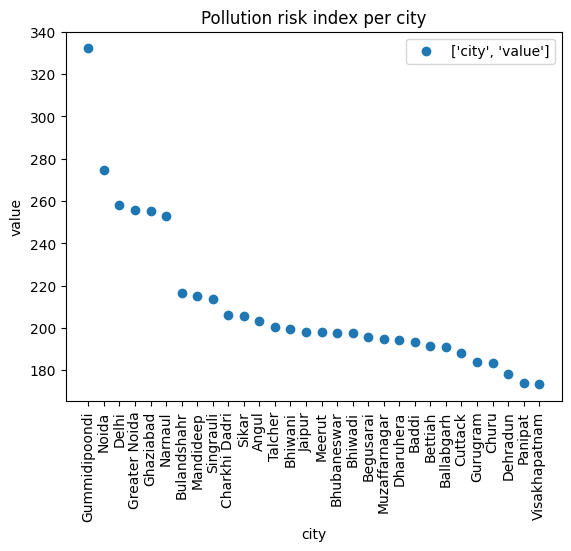

In [ ]:
plt.scatter(df5["city"].head(30),df5["final_percentage"].head(30),label=['city',"value"])
plt.title("Pollution risk index per city")
plt.xlabel("city")
plt.ylabel("value")
plt.xticks(rotation=90)
plt.legend()

📊 Simple Summary


Delhi	 → Poor → Very Poor → Severe	Historically very polluted overall


Gummidipoondi	 → Unhealthy → Severe	Can be worse than Delhi at times

👉 So yes — based on some real-time readings, Gummidipoondi can be more polluted than Delhi at specific times. But Delhi tends to be more consistently severe over longer periods due to years of high emissions and winter smog conditions.